In [1]:
import os
os.chdir('../')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import mean_squared_error
from datamodel import Listing, Observation, Order, OrderDepth, ProsperityEncoder, Symbol, Trade, TradingState, ConversionObservation


data_1 = pd.read_csv('data/trades_round_1_day_-2_wn.csv', sep =";")
data_2 = pd.read_csv('data/trades_round_1_day_-1_wn.csv', sep =";")
data_3 = pd.read_csv('data/trades_round_1_day_0_wn.csv', sep =";")

data=[data_1, data_2, data_3]
data= pd.concat(data)
data.head()


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Vinnie,Ruby,AMETHYSTS,SEASHELLS,9996.0,1
1,0,Remy,Valentina,STARFRUIT,SEASHELLS,5003.0,1
2,0,Remy,Ruby,AMETHYSTS,SEASHELLS,9996.0,1
3,100,Ruby,Valentina,STARFRUIT,SEASHELLS,5004.0,6
4,900,Rhianna,Valentina,STARFRUIT,SEASHELLS,5001.0,2


In [4]:
#create 4 different dataframes from data for each product CHOCOLATE, STRAWBERRY, ROSES, GIFT_BASKET
data_amethysts = data[data['symbol'] == 'AMETHYSTS'].reset_index(drop=True)
data_starfruit = data[data['symbol'] == 'STARFRUIT'].reset_index(drop=True)



In [27]:
levels = data_starfruit['buyer'].unique()
starfruit_buyers = ['Remy', 'Ruby', 'Rihanna', 'Vinnie', 'Valentina', 'Vladimir', 'Adam', 'Amelia']
starfruit_data = {}

for buyer in levels:
    starfruit_data[buyer.lower()] = data_starfruit[(data_starfruit['buyer'] == buyer) | (data_starfruit['seller'] == buyer)].reset_index(drop=True)


In [29]:
starfruit_data['valentina']

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Remy,Valentina,STARFRUIT,SEASHELLS,5003.0,1
1,100,Ruby,Valentina,STARFRUIT,SEASHELLS,5004.0,6
2,900,Rhianna,Valentina,STARFRUIT,SEASHELLS,5001.0,2
3,1100,Valentina,Remy,STARFRUIT,SEASHELLS,4997.0,1
4,1500,Remy,Valentina,STARFRUIT,SEASHELLS,5003.0,1
...,...,...,...,...,...,...,...
5861,996700,Valentina,Ruby,STARFRUIT,SEASHELLS,5053.0,10
5862,996900,Valentina,Remy,STARFRUIT,SEASHELLS,5051.0,1
5863,997000,Adam,Valentina,STARFRUIT,SEASHELLS,5056.0,8
5864,998800,Valentina,Remy,STARFRUIT,SEASHELLS,5050.0,1


In [33]:
buy_valentina = data[data['buyer'] == 'Valentina'].timestamp

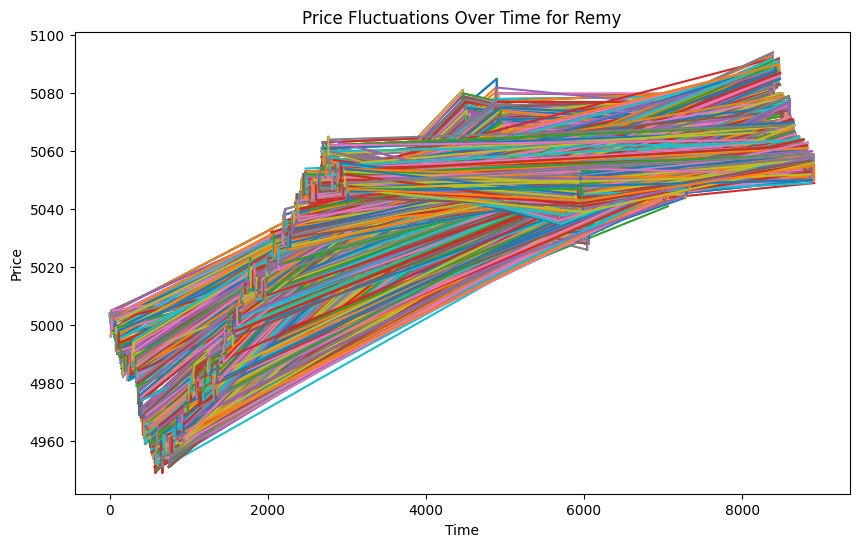

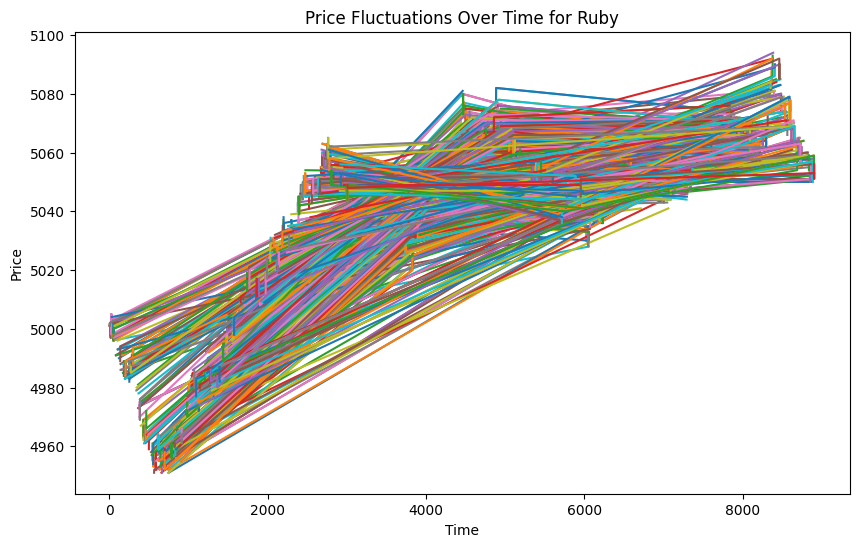

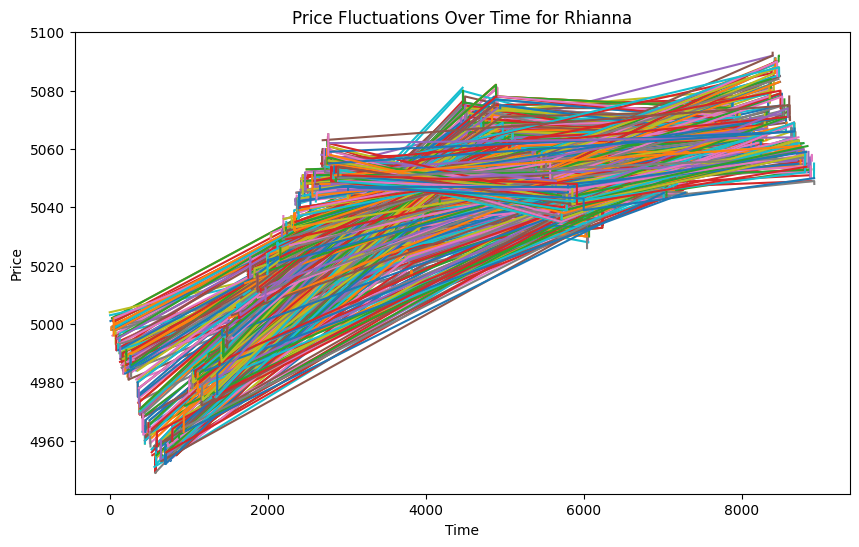

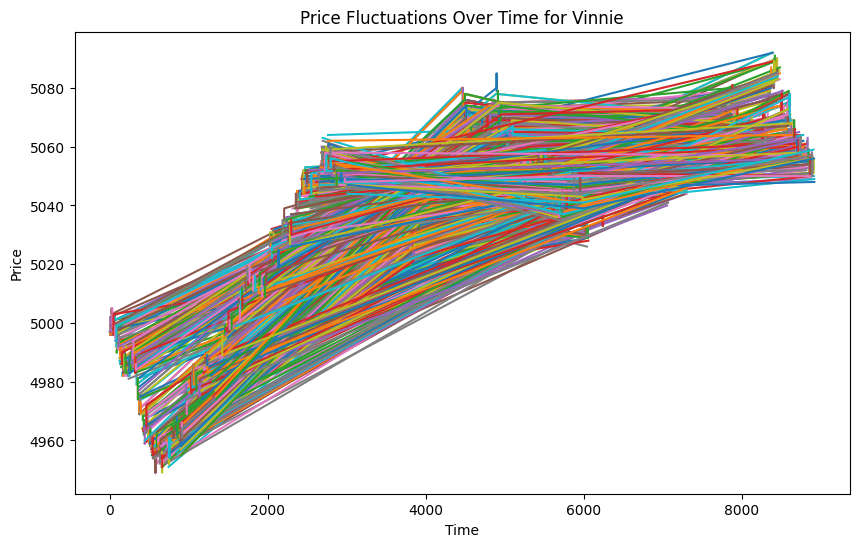

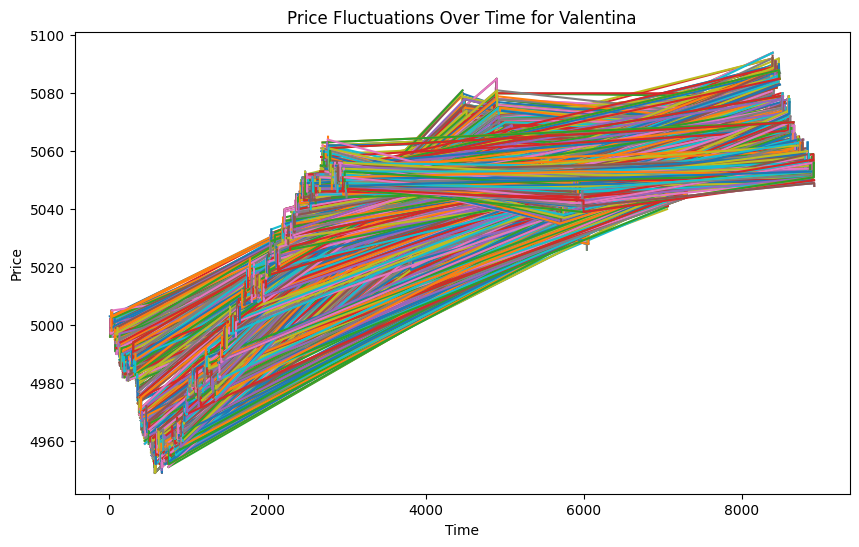

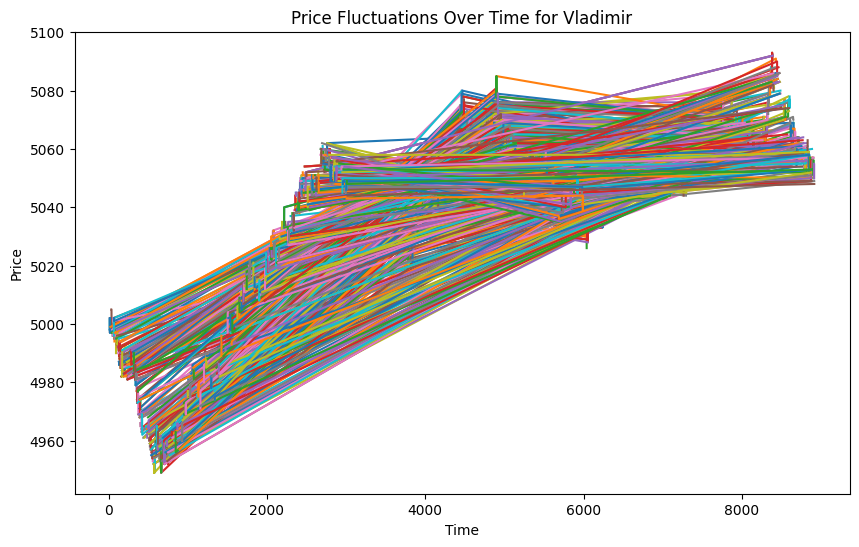

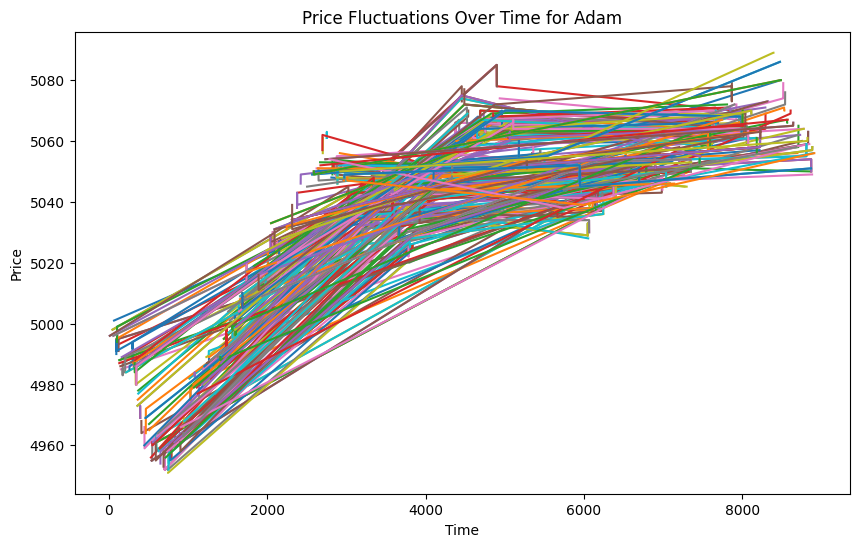

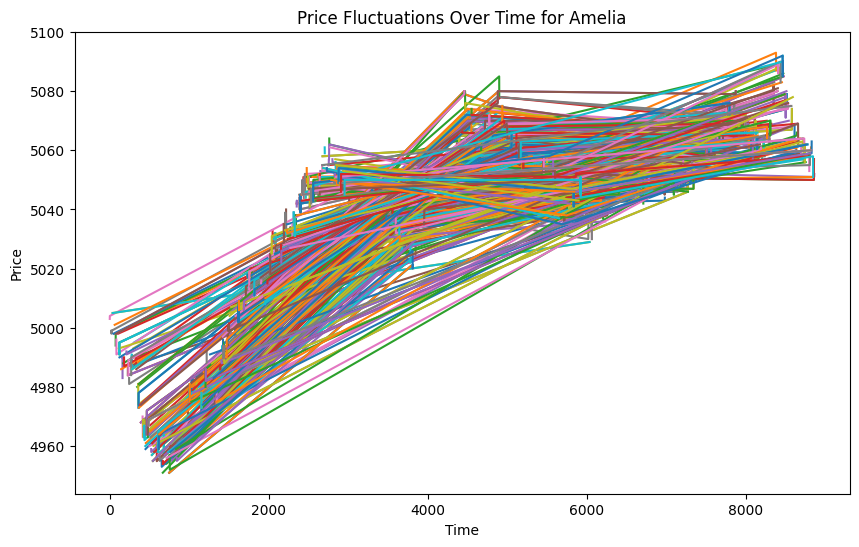

In [53]:

buyers_timestamps = {}

for buyer in levels:
    buyers_timestamps[buyer] = data[data['buyer'] == buyer]['timestamp']

    plt.figure(figsize=(10, 6))

    for time in buyers_timestamps[buyer].iloc[1:10000,]:
        # Plot the price from timestamp = time until timestamp = time + 1000
        prices = data_starfruit[(data_starfruit['timestamp'] >= time) & (data_starfruit['timestamp'] <= time + 300)]['price']
        plt.plot(prices)

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Price Fluctuations Over Time for {buyer}')

    # Show the plot
    plt.show()

In [ ]:
#remy is good at buying low and selling high